# Spatial Data Formats

## Raster Data


In [5]:
# Import necessary packages
import os

import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd
import rioxarray as rxr

# Earthpy is an earthlab package to work with spatial data
import earthpy as et
import earthpy.plot as ep

# Get data and set working directory
et.data.get_data("colorado-flood")
os.chdir(os.path.join(et.io.HOME, 'earth-analytics', 'data'))

The raster data file is a .tif, Tagged Image File format. It is a lidar, Light Detection and Ranging, derived elevation data. This is used to represent a DTM, Digital Terrain Model.

In [6]:
# Create a path to file
lidar_dtm_path = os.path.join("colorado-flood",
                              "spatial",
                              "boulder-leehill-rd",
                              "pre-flood",
                              "lidar",
                              "pre_DTM.tif")
lidar_dtm_path

'colorado-flood/spatial/boulder-leehill-rd/pre-flood/lidar/pre_DTM.tif'

In [7]:
# Open and read in the digital terrain model
# Note that rxr is the alias for rioxarray
lidar_dtm = rxr.open_rasterio(lidar_dtm_path, masked=True)

# View the data - notice the data structure is different from geopandas data
# which you explored in the last lesson
lidar_dtm

<xarray.DataArray (band: 1, y: 2000, x: 4000)>
[8000000 values with dtype=float32]
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 4.72e+05 4.72e+05 4.72e+05 ... 4.76e+05 4.76e+05
  * y            (y) float64 4.436e+06 4.436e+06 ... 4.434e+06 4.434e+06
    spatial_ref  int64 0
Attributes:
    scale_factor:  1.0
    add_offset:    0.0

In [10]:
type(lidar_dtm)

xarray.core.dataarray.DataArray

In [15]:
lidar_dtm.shape

(1, 2000, 4000)

In [8]:
lidar_dtm.x

<xarray.DataArray 'x' (x: 4000)>
array([472000.5, 472001.5, 472002.5, ..., 475997.5, 475998.5, 475999.5])
Coordinates:
  * x            (x) float64 4.72e+05 4.72e+05 4.72e+05 ... 4.76e+05 4.76e+05
    spatial_ref  int64 0

In [13]:
print(lidar_dtm.max())

<xarray.DataArray ()>
array(2087.43, dtype=float32)
Coordinates:
    spatial_ref  int64 0


In [14]:
print(lidar_dtm.min())

<xarray.DataArray ()>
array(1676.21, dtype=float32)
Coordinates:
    spatial_ref  int64 0


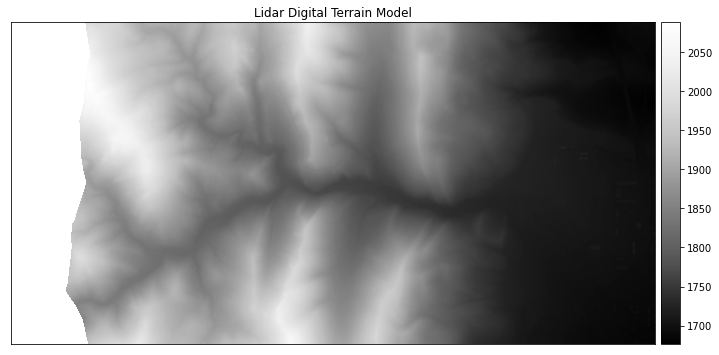

In [28]:
ep.plot_bands(lidar_dtm,
                scale=False,
                cmap="Greys_r",
                title="Lidar Digital Terrain Model")
# Typo: cmap="Greys" -> cmap="Greys_r"
plt.show()

### Challenge 1
What do the colors in the plot above represent? What are the units of the grey scale?
The raster data is a grid of cells. A single cell is output as a pixel. Each cell corresponds to space on the ground. The raster data has a resolution property, which describes the size of that space (eg. a 1 meter resolution raster captures a 1m x 1m area as one pixel).
The image above is a single layer of raster data captured by lidar. Each cell represents the elevation of an area. The cell represents a lidar intensity value, the amount of light energy measured by a sensor.

### Challenge 2

In [17]:
lidar_dtm_post_path = os.path.join("colorado-flood",
                                    "spatial",
                                    "boulder-leehill-rd",
                                    "post-flood",
                                    "lidar",
                                    "post_DTM.tif")
lidar_dtm_post_path

'colorado-flood/spatial/boulder-leehill-rd/post-flood/lidar/post_DTM.tif'

In [18]:
lidar_dtm_post = rxr.open_rasterio(lidar_dtm_post_path, masked=True)
lidar_dtm_post

<xarray.DataArray (band: 1, y: 2000, x: 4000)>
[8000000 values with dtype=float32]
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 4.72e+05 4.72e+05 4.72e+05 ... 4.76e+05 4.76e+05
  * y            (y) float64 4.436e+06 4.436e+06 ... 4.434e+06 4.434e+06
    spatial_ref  int64 0
Attributes:
    scale_factor:  1.0
    add_offset:    0.0

In [19]:
print(lidar_dtm_post.min())

<xarray.DataArray ()>
array(1675.71, dtype=float32)
Coordinates:
    spatial_ref  int64 0


In [20]:
print(lidar_dtm_post.max())

<xarray.DataArray ()>
array(2111.96, dtype=float32)
Coordinates:
    spatial_ref  int64 0


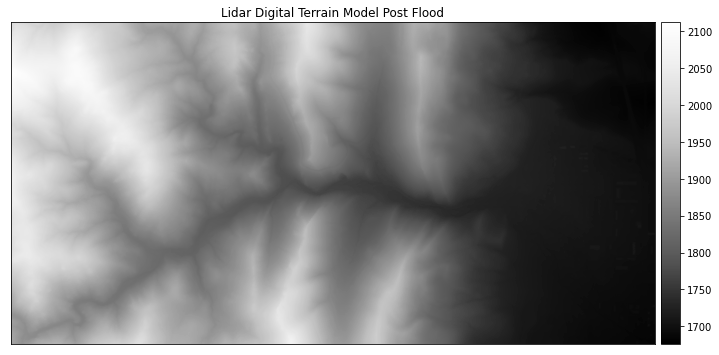

In [27]:
ep.plot_bands(lidar_dtm_post,
                scale=False,
                cmap="Greys_r",
                title="Lidar Digital Terrain Model Post Flood")
plt.show()

## Imagery Raster Data

In [29]:
# Download NAIP data
et.data.get_data(url="https://ndownloader.figshare.com/files/23070791")

Extracted output to /home/sofia/earth-analytics/data/earthpy-downloads/naip-before-after


'/home/sofia/earth-analytics/data/earthpy-downloads/naip-before-after'

In [30]:
# Create a path for the data file - notice it is a .tif file
naip_pre_fire_path = os.path.join("earthpy-downloads",
                                  "naip-before-after",
                                  "pre-fire",
                                  "crop",
                                  "m_3910505_nw_13_1_20150919_crop.tif")

naip_pre_fire_path

'earthpy-downloads/naip-before-after/pre-fire/crop/m_3910505_nw_13_1_20150919_crop.tif'

In [31]:
naip_pre_fire = rxr.open_rasterio(naip_pre_fire_path)
naip_pre_fire

<xarray.DataArray (band: 4, y: 2312, x: 4377)>
[40478496 values with dtype=int16]
Coordinates:
  * band         (band) int64 1 2 3 4
  * x            (x) float64 4.572e+05 4.572e+05 ... 4.615e+05 4.615e+05
  * y            (y) float64 4.427e+06 4.427e+06 ... 4.425e+06 4.425e+06
    spatial_ref  int64 0
Attributes:
    STATISTICS_MAXIMUM:  239
    STATISTICS_MEAN:     nan
    STATISTICS_MINIMUM:  32
    STATISTICS_STDDEV:   nan
    _FillValue:          -32768.0
    scale_factor:        1.0
    add_offset:          0.0

In [32]:
naip_pre_fire.shape

(4, 2312, 4377)

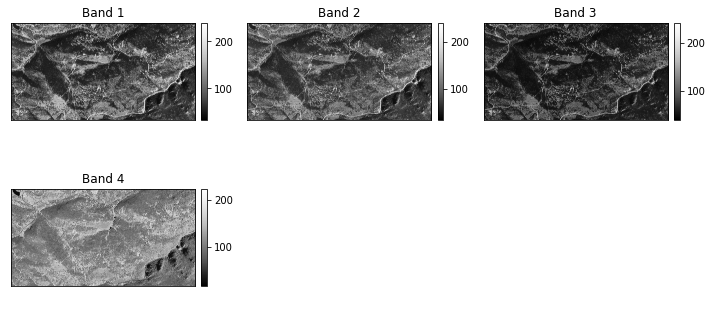

In [33]:
# Plot each layer or band of the image separately
ep.plot_bands(naip_pre_fire, figsize=(10, 5))
plt.show()

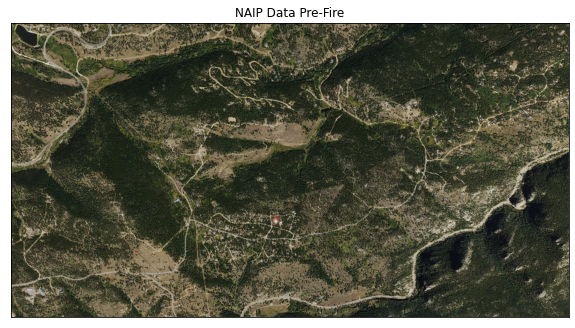

In [34]:
ep.plot_rgb(naip_pre_fire.values,
            title="NAIP Data Pre-Fire")
plt.show()

### Challenge 3: Plot post fire image data.

In [35]:
naip_post_fire_path = os.path.join("earthpy-downloads",
                                   "naip-before-after",
                                   "post-fire",
                                   "crop",
                                   "m_3910505_nw_13_1_20170902_crop.tif")
naip_post_fire_path

'earthpy-downloads/naip-before-after/post-fire/crop/m_3910505_nw_13_1_20170902_crop.tif'

In [36]:
naip_post_fire = rxr.open_rasterio(naip_post_fire_path)
naip_post_fire

<xarray.DataArray (band: 4, y: 2312, x: 4377)>
[40478496 values with dtype=int16]
Coordinates:
  * band         (band) int64 1 2 3 4
  * x            (x) float64 4.572e+05 4.572e+05 ... 4.615e+05 4.615e+05
  * y            (y) float64 4.427e+06 4.427e+06 ... 4.425e+06 4.425e+06
    spatial_ref  int64 0
Attributes:
    STATISTICS_MAXIMUM:  234
    STATISTICS_MEAN:     63.874147003881
    STATISTICS_MINIMUM:  6
    STATISTICS_STDDEV:   47.250919834769
    _FillValue:          -32768.0
    scale_factor:        1.0
    add_offset:          0.0

In [38]:
naip_post_fire.shape

(4, 2312, 4377)

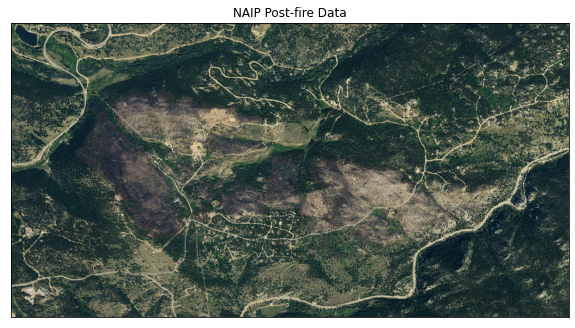

In [39]:
ep.plot_rgb(naip_post_fire.values,
            title="NAIP Post-fire Data")
plt.show()